In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

In [2]:


# We need 2 quantum bits and 2 classical bits
qr_sd = QuantumRegister(2, 'q')
cr_sd = ClassicalRegister(2, 'c')
qc_sd = QuantumCircuit(qr_sd, cr_sd)

qc_sd.h(0)
qc_sd.cx(0, 1)

qc_sd.barrier();

In [3]:

message = '11'

# Apply the encoding rule for '11': X gate then Z gate on Alice's qubit
qc_sd.x(0)
qc_sd.z(0)

qc_sd.barrier();

In [4]:

# Bob applies a CNOT gate (Alice's qubit is the control, Bob's is the target)
qc_sd.cx(0, 1)

# Bob applies a Hadamard gate to Alice's qubit
qc_sd.h(0)

qc_sd.barrier();

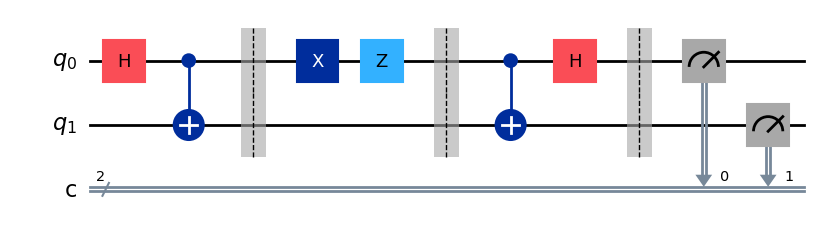

In [5]:

# Measure Qubit 0 to Classical Bit 0, and Qubit 1 to Classical Bit 1
qc_sd.measure([0, 1], [0, 1])

# Draw the full circuit diagram (no semicolon needed here so the image prints)
qc_sd.draw('mpl')

Message sent: 11
Measurement counts: {'11': 1000}


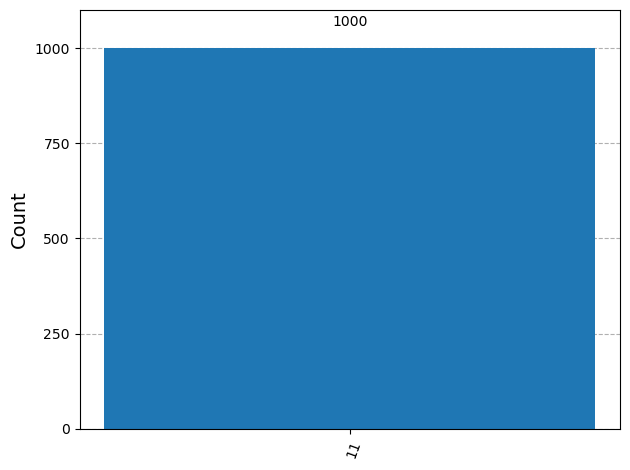

In [6]:

# Plot the histogram 
backend = Aer.get_backend('aer_simulator')
job_sd = backend.run(qc_sd, shots=1000)
counts_sd = job_sd.result().get_counts()

print(f"Message sent: {message}")
print(f"Measurement counts: {counts_sd}")

plot_histogram(counts_sd)